In [142]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# Additional dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [116]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [117]:
#  3. Convert the June temperatures to a list.
june_temp_list = list(june_temp)

In [123]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns=['date','June Temperatures'])

In [124]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [125]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [126]:
# 7. Convert the December temperatures to a list.
dec_temp_list = list(dec_temp)

In [129]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp_list, columns=['date','Dec Temperatures'])

In [130]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,Dec Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Additional Queries

<AxesSubplot:title={'center':'June 2010-2017'}, ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

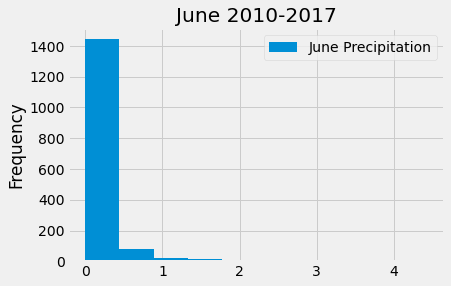

In [162]:
# Query to retrieve the precipitation scores
jun_prec = []
jun_prec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
# Save results as a DataFrame
jun_prec_df = pd.DataFrame(jun_prec, columns=['date','June Precipitation'])
jun_prec_df.set_index(jun_prec_df['date'], inplace=True)
# plot the results as a histogram
plt.tight_layout()
jun_prec_df.plot.hist(bins=10, title='June 2010-2017')

In [163]:
# summary statistics for the June precipitation DataFrame
jun_prec_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:title={'center':'December 2010-2017'}, ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

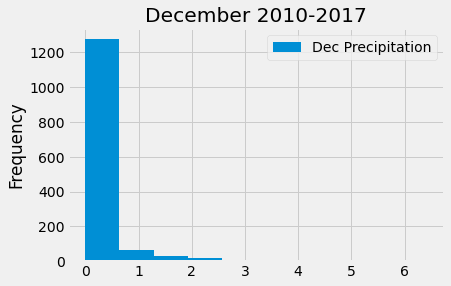

In [164]:
# Query to retrieve the precipitation scores
dec_prec = []
dec_prec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
# Save results as a DataFrame
dec_prec_df = pd.DataFrame(dec_prec, columns=['date','Dec Precipitation'])
dec_prec_df.set_index(dec_prec_df['date'], inplace=True)
# plot the results as a histogram
plt.tight_layout()
dec_prec_df.plot.hist(bins=10, title='December 2010-2017')

In [165]:
# summary statistics for the Decemeber precipitation DataFrame
dec_prec_df.describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:title={'center':'June 2010-2017'}, ylabel='Frequency'>

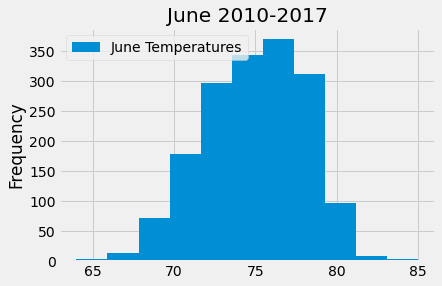

In [158]:
# plot the results as a histogram
june_temp_df.plot.hist(bins=11, title='June 2010-2017')

<AxesSubplot:title={'center':'December 2010-2017'}, ylabel='Frequency'>

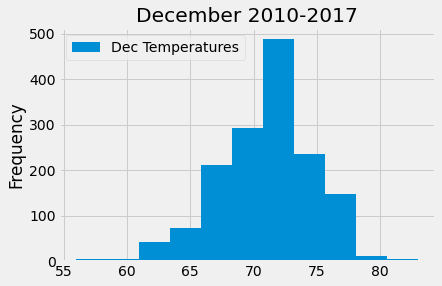

In [159]:
# plot the results as a histogram
dec_temp_df.plot.hist(bins=11, title='December 2010-2017')